In [ ]:
import os
import pandas as pd
import numpy as np
import datetime
import tqdm
import json

import matplotlib.pyplot as plt

### Setting Directory

In [3]:

image_dir = 'D:\Dissertation\Preprocessing\helioviewer_images'
# Path to the JSON file
file_path = 'D:\\Dissertation\\Kp data\\kpdata.json'




### Opening Kp and converting to Dataframe
#### Export as CSV

In [4]:
# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert datetime and Kp values to numpy arrays
datetime_array = np.array(data['datetime'])
Kp = np.array(data['Kp'])

df = pd.DataFrame({'datetime': datetime_array, 'Kp': Kp})
print(df.head())

df.to_csv('D:\\Dissertation\\Kp data\\kpdata.csv', index=False)

               datetime     Kp
0  2011-01-01T00:00:00Z  1.333
1  2011-01-01T03:00:00Z  0.667
2  2011-01-01T06:00:00Z  0.000
3  2011-01-01T09:00:00Z  0.667
4  2011-01-01T12:00:00Z  1.000


### Making list of images

In [5]:
# List all files in the image directory
image_files = []
for root, dirs, files in os.walk(image_dir):
    for d in dirs:
        image_directory = os.path.join(root, d)
        image_files += [os.path.join(image_directory, f).replace('D:\\Dissertation\\Preprocessing\\', '/content/') for f in os.listdir(image_directory) if f.endswith('.jp2')]
        image_files = [f.replace('\\', '/') for f in image_files]
print(f'Found {len(image_files)} Image files')
print(image_files[:5])

Found 122736 Image files
['/content/helioviewer_images/2011/AIA_193_20110101_000000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_010000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_020000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_030000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_040000.jp2']


### Grouping images by 10

In [6]:
count = 0
group = []
for i in range(0, len(image_files), 10):
    group += [image_files[i:i+10]]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])
group = group[0: -1]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])

12274
10
6
[['/content/helioviewer_images/2011/AIA_193_20110101_000000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_010000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_020000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_030000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_040000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_050000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_060000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_070000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_080000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_090000.jp2'], ['/content/helioviewer_images/2011/AIA_193_20110101_100000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_110000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_120000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_130000.jp2', '/content/helioviewer_images/2011/AIA_193_20110101_140000.jp2', '/content/helioviewer_ima

In [7]:
list_of_dates = []
for i in group:
    last_image = i[-1].split('/')[-1]
    year = last_image[8:12]
    month = last_image[12:14]
    day = last_image[14:16]
    hour = last_image[17:19]
    date = datetime.datetime(int(year), int(month), int(day), int(hour))
    list_of_dates.append(date)
print(len(list_of_dates))
for date in list_of_dates:
    print(date)

12273
2011-01-01 09:00:00
2011-01-01 19:00:00
2011-01-02 05:00:00
2011-01-02 15:00:00
2011-01-03 01:00:00
2011-01-03 11:00:00
2011-01-03 21:00:00
2011-01-04 07:00:00
2011-01-04 17:00:00
2011-01-05 03:00:00
2011-01-05 13:00:00
2011-01-05 23:00:00
2011-01-06 09:00:00
2011-01-06 19:00:00
2011-01-07 05:00:00
2011-01-07 15:00:00
2011-01-08 01:00:00
2011-01-08 11:00:00
2011-01-08 21:00:00
2011-01-09 07:00:00
2011-01-09 17:00:00
2011-01-10 03:00:00
2011-01-10 13:00:00
2011-01-10 23:00:00
2011-01-11 09:00:00
2011-01-11 19:00:00
2011-01-12 05:00:00
2011-01-12 15:00:00
2011-01-13 01:00:00
2011-01-13 11:00:00
2011-01-13 21:00:00
2011-01-14 07:00:00
2011-01-14 17:00:00
2011-01-15 03:00:00
2011-01-15 13:00:00
2011-01-15 23:00:00
2011-01-16 09:00:00
2011-01-16 19:00:00
2011-01-17 05:00:00
2011-01-17 15:00:00
2011-01-18 01:00:00
2011-01-18 11:00:00
2011-01-18 21:00:00
2011-01-19 07:00:00
2011-01-19 17:00:00
2011-01-20 03:00:00
2011-01-20 13:00:00
2011-01-20 23:00:00
2011-01-21 09:00:00
2011-01-21 19:

In [8]:
matched_kp = []
matched_kp_index = []
# Convert datetime column to datetime type if it's not already and remove timezone information
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
for i in range(len(list_of_dates)):
    date = list_of_dates[i]
    date = date + datetime.timedelta(days=2)
    match = df[df['datetime'] >= date][0:1]
    if match.empty:
        print(f'No match found for {date}')
    matched_kp += match['datetime'].tolist()
    matched_kp_index += match.index.tolist()
    
print(len(matched_kp))
print(len(matched_kp_index))
print(matched_kp[:5])
print(list_of_dates[:5])

12273
12273
[Timestamp('2011-01-03 09:00:00'), Timestamp('2011-01-03 21:00:00'), Timestamp('2011-01-04 06:00:00'), Timestamp('2011-01-04 15:00:00'), Timestamp('2011-01-05 03:00:00')]
[datetime.datetime(2011, 1, 1, 9, 0), datetime.datetime(2011, 1, 1, 19, 0), datetime.datetime(2011, 1, 2, 5, 0), datetime.datetime(2011, 1, 2, 15, 0), datetime.datetime(2011, 1, 3, 1, 0)]


In [9]:
max_Kp_values = []
for index in matched_kp_index:
    kp_values = Kp[index: index + 9]
    max_Kp = max(kp_values)
    max_Kp_values.append(max_Kp)
print(len(max_Kp_values))  


12273


count    12273.000000
mean         2.870444
std          1.339473
min          0.000000
25%          2.000000
50%          2.667000
75%          3.667000
max          9.000000
Name: Kp, dtype: float64


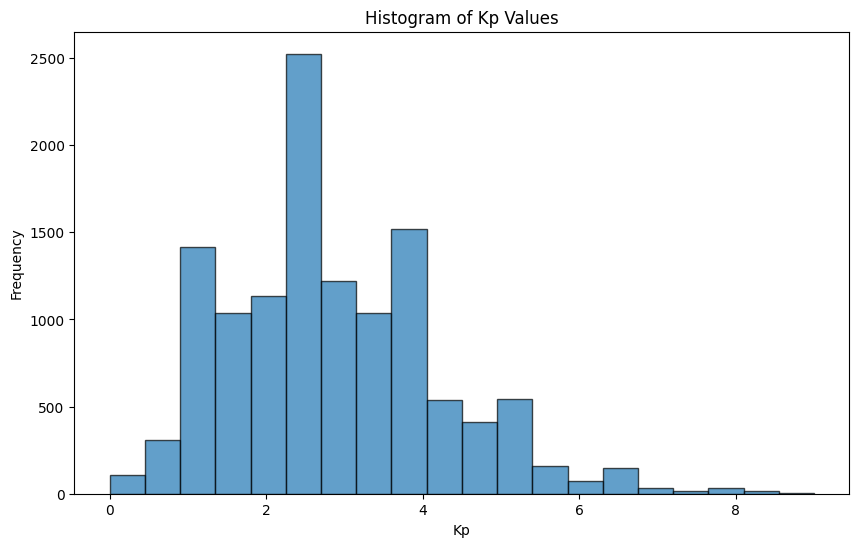

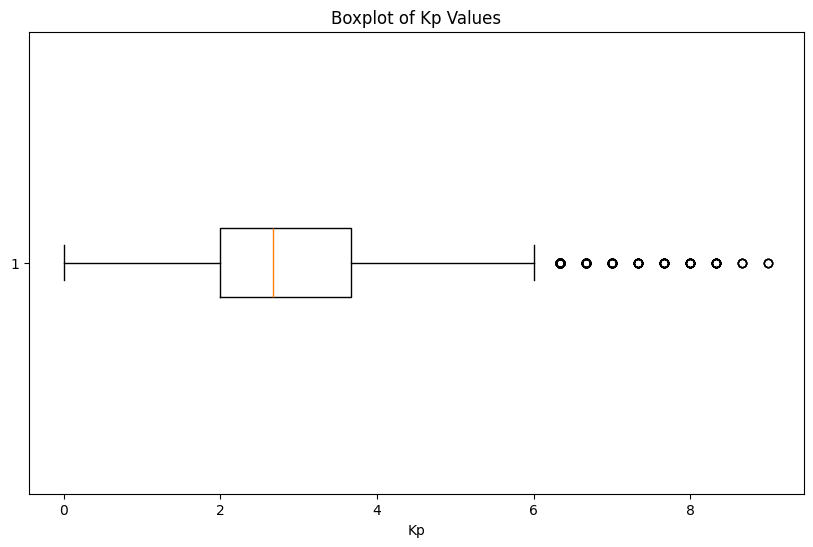

In [ ]:
# Convert group to a DataFrame and export as CSV
group_df = pd.DataFrame({'Images': group, 'Kp': max_Kp_values})
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# Calculate statistics of Kp values
kp_stats = group_df['Kp'].describe()
print(kp_stats)


# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()




count    1023.000000
mean        2.789508
std         1.310137
min         0.000000
25%         1.667000
50%         2.667000
75%         3.667000
max         8.333000
Name: Kp, dtype: float64


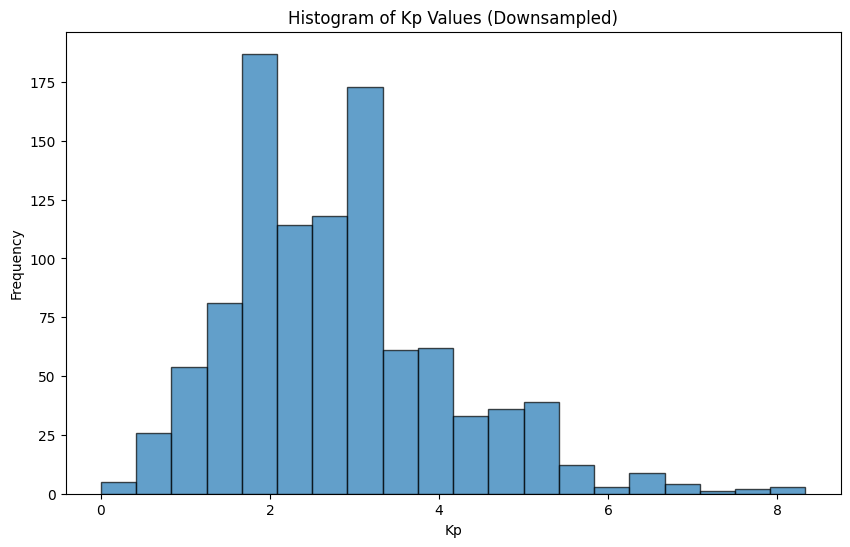

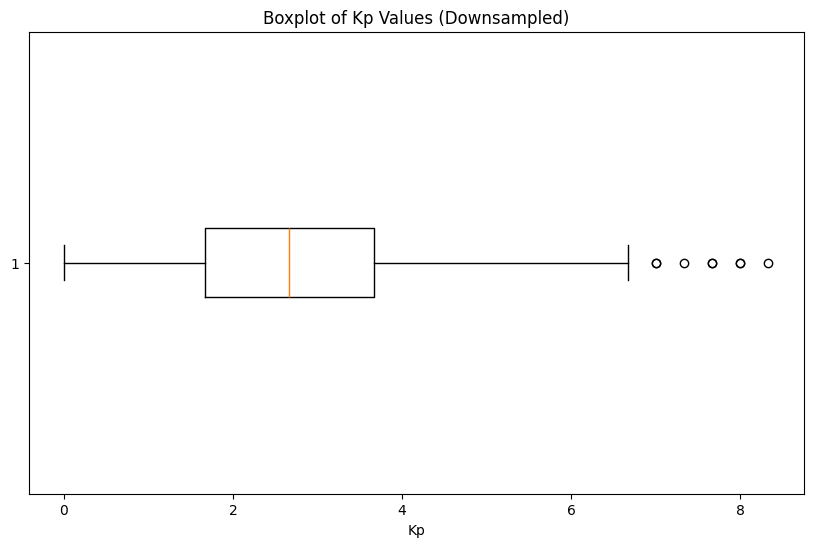

In [ ]:
group_df = group_df[::12]
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# Calculate statistics of Kp values for the downsampled group_df
kp_stats_downsampled = group_df['Kp'].describe()
print(kp_stats_downsampled)

# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values (Downsampled)')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()
